# 합성곱 신경망(CNN)
## 7.1 전체 구조 
* CNN은 이미지 인식과 음성 인식 등 다양한 곳에서 사용, 이미지 인식 분야에서 딥러닝을 활용한 기법은 거의 CNN을 기초로 함
* 완전연결(fully-connected) : 지금까지 본 신겨망은 인접하는 계층의 모든 뉴런과 결합되어 있음, 완전히 연결된 계층을 Affine 계층이라는 이름으로 구현
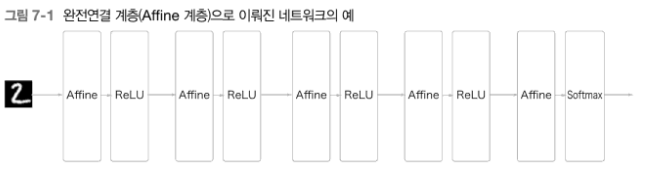
* Affine-ReLU 조합이 4개가 쌓였고, 마지막 5번째 층은 Affine 계층에 이어 소프트맥스 계층에서 최종 결과(확률)를 출력

### CNN 구조
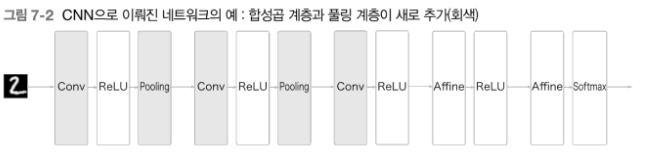
* 합성곱 계층과 풀링 계층이 새로 추가됨

## 7.2 합성곱 계층
### 7.2.1 완전연결 계층의 문제점
* 완전연결 계층에서는 인접하는 계층의 뉴런이 모두 연결되고 출력의 수는 임의로 정할 수 있음
* 완전연결 계층 문제점 : 데이터의 형상이 무시됨 -> 형상을 무시하고 모든 입력 데이터를 동등한 뉴런(같은 차원의 뉴런)으로 취급하여 형상에 담긴 정보를 살릴 수 없음
* 합성곱 계층은 형상을 유지하여 이미지도 3차원 데이터로 입력받으며, 다음 계층에도 3차원 데이터로 전달

* CNN에서는 합성곱 계층의 입출력 데이터를 특징 맵이라고 함(입력 데이터 - 입력 특징 맵, 출력 데이터 - 출력 특징 맵)

### 7.2.2 합성곱 연산
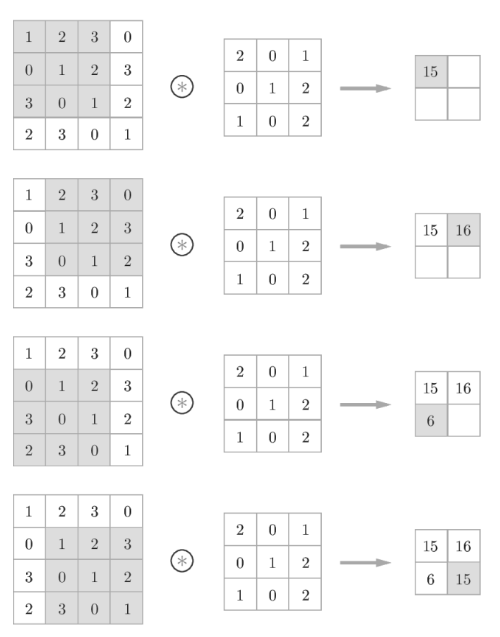
* 단일 곱셈-누산(fused multiply-add) : 입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합을 구함 

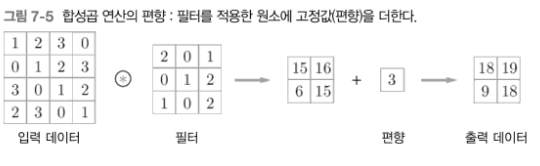
* CNN에서는 필터의 매개변수가 그동안의 '가중치'에 해당함, 그리고 CNN에도 편향이 존재함 
* 편향은 필터를 적용한 후의 데이터에 더해지고 편향은 항상 하나(1x1)만 존재함(그 하나의 값을 필터를 적용한 모든 원소에 더함)

### 7.2.3 패딩
* 패딩(padding) : 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(예컨대 0)으로 채우는 것
* 출력 크기를 조정할 목적으로 사용
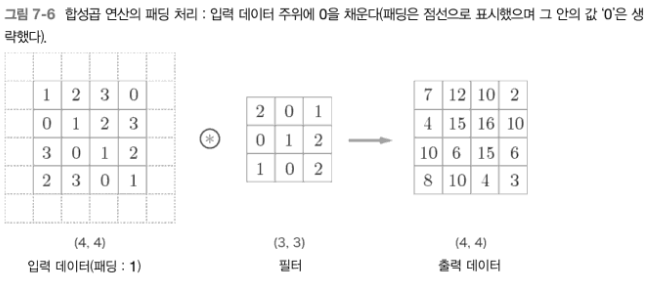

### 7.2.4 스트라이드
* 스트라이드(stride) : 필터를 적용하는 위치의 간격
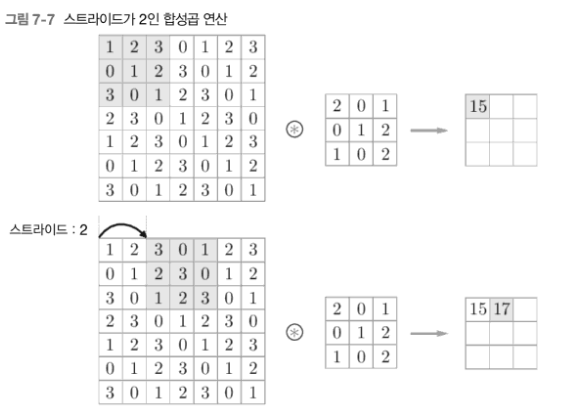

#### 수식화(입력 크기(H, W), 필터 크기(FH, FW), 출력 크기(OH, OW), 패딩 P, 스트라이드 S (값이 정수로 나눠떨어져야 함)
* OH=(H+2P-FH)/S+1
* OW=(W+2P-FW)/S+1

### 7.2.5 3차원 데이터의 합성곱 연산
* 채널 쪽으로 특징 맵이 여러 개 있다면 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 얻음
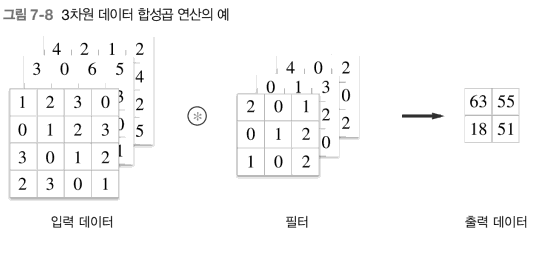

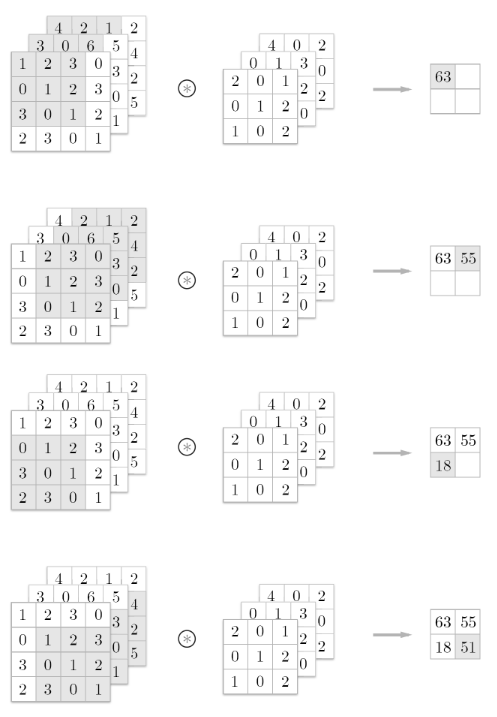
* 3차원의 합성곱 연산에서 주의할 점은 입력 데이터의 채널 수와 필터의 채널 수가 같아야 함

### 7.2.6 블록으로 생각하기
* 3차원의 합성곱 연산은 데이터와 필터를 직육면체 블록이라고 생각하면 쉬움

### 7.2.7 배치 처리
* 각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터로 저장 (데이터 수, 채널 수, 높이, 너비)
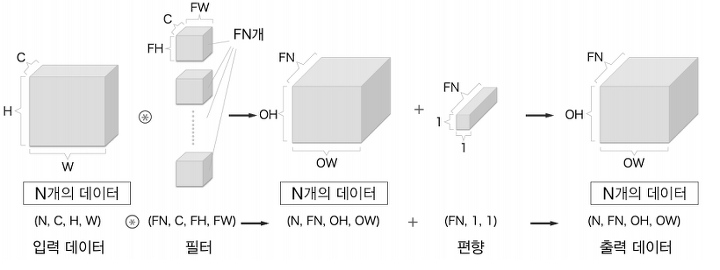
* 신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱 연산이 이뤄짐(N회 분의 처리를 한 번에 수행)

## 7.3 풀링 계층
* 풀링 : 세로. 가로 방향의 공간을 줄이는 연산
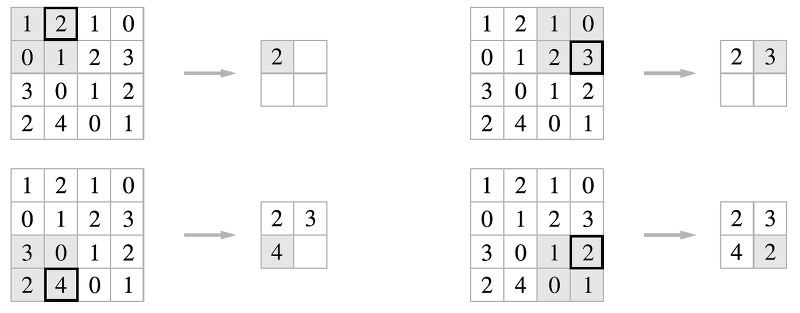
* 최대 풀링 : 최댓값을 구하는 연산 (이미지 인식 분야에서 사용)
* 평균 풀링

### 7.3.1 풀링 계층의 특징
* 학습해야 할 매개변수가 없음 : 풀링은 대상 영역에서 최댓값이나 평균울 취하는 명확한 처리이므로 특별히 학습할 것이 없음
* 채널 수가 변하지 않음 : 입력 데이터의 채널 수 그대로 출력 데이터로 내보냄 (채널마다 독립적으로 계산) 
* 입력의 변화에 영향을 적게 받음(강건함)

## 7.4 합성곱/풀링 계층 구현하기
* 데이터의 형상이 (10, 1, 28, 28)이라면 높이 28, 너비 28, 채널 1개인 데이터가 10개

In [3]:
import numpy as np

In [4]:
# 7.4.1
x = np.random.rand(10, 1, 28, 28)
x.shape

(10, 1, 28, 28)

In [5]:
print(x[0].shape) # 첫 번째 데이터에 접근
print(x[1].shape) # 두 번째 데이터에 접근

(1, 28, 28)
(1, 28, 28)


In [6]:
x[0, 0] # 첫 번째 데이터의 첫 채널의 공간 데이터에 접근

array([[8.31512830e-01, 5.85653523e-01, 8.88368325e-01, 9.17222309e-01,
        3.16343163e-01, 9.33146852e-01, 3.18729537e-01, 2.48153337e-02,
        3.11639930e-02, 9.58095058e-01, 4.29885953e-01, 2.33273023e-01,
        1.76351576e-02, 4.72468806e-01, 1.25334750e-01, 9.21059652e-01,
        8.61717305e-01, 3.33881438e-01, 8.32548015e-02, 3.29854942e-01,
        8.61113460e-01, 8.52026324e-01, 2.38214549e-01, 5.80524269e-02,
        4.15880085e-01, 4.49691897e-01, 3.87209753e-01, 5.94241866e-01],
       [7.38266178e-01, 3.59758802e-01, 4.94758735e-01, 8.36768920e-02,
        1.39619355e-01, 7.35438697e-01, 8.09376043e-01, 2.37439009e-01,
        5.09123373e-01, 1.16776851e-02, 4.95001402e-01, 9.21476786e-01,
        8.13470608e-01, 6.14342357e-01, 6.89012203e-01, 2.08703011e-01,
        6.11837362e-01, 7.23951419e-01, 4.36780912e-01, 5.93107907e-01,
        5.29928068e-01, 1.32349945e-01, 2.55221215e-01, 4.94608550e-01,
        1.27657123e-01, 4.18799058e-01, 2.96317502e-01, 5.93946

### 7.4.2 im2col로 데이터 전개하기
* 입력 데이터를 필터링(가중치 계산)하기 좋게 전개하는(펼치는) 함수
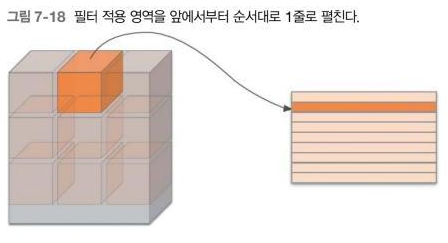
* 보기 좋게끔 스트라이드를 크게 잡아 필터의 적용 영역이 겹치지 않도록 했지만, 실제 상황에서는 영역이 겹치는 경우가 대부분임
* 필터 적용 영역이 겹치게 되면 im2col로 전개한 후의 원소 수가 원래 블록의 원소 수보다 많아짐 -> 메모리를 더 많이 소비

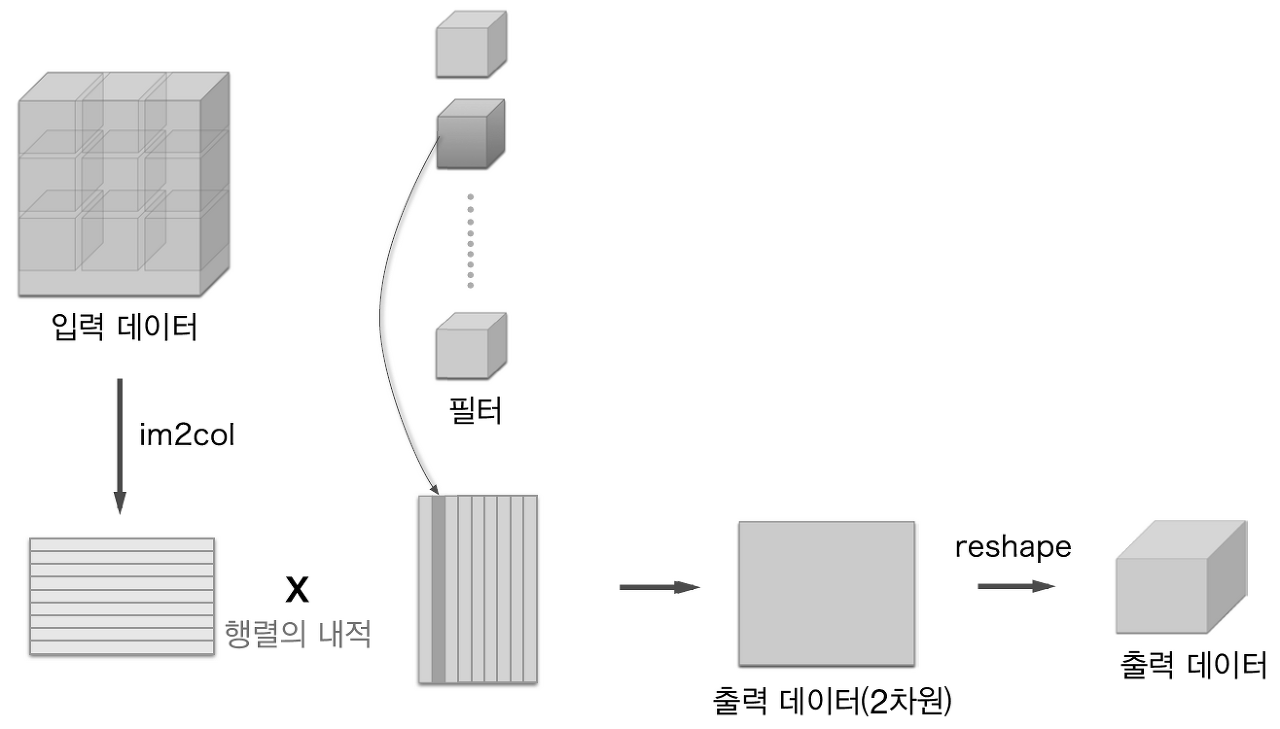
* im2col로 입력 데이터를 전개한 다음에는 합성곱 계층의 필터(가중치)를 1열 전개하고, 두 행렬의 곱을 계산하면 됨

### 7.4.3 합성곱 계층 구현하기
* input_data : (데이터 수, 채널 수, 높이, 너비)의 4차원 배열로 이뤄진 입력 데이터
* filter_h : 필터의 높이
* filter_w : 필터의 너비
* stride : 스트라이드
* pad : 패딩 

In [7]:
# 7.4.3

import sys, os
sys.path.append("C:/Users/esj06/Desktop/deep-learning-from-scratch-master")
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7) # 데이터 1개, 채널 3개, 높이x너비 =7X7
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(9, 75)
(90, 75)


In [8]:
# 합성곱 계층 구현 
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape # FN : 필터 개수, C : 채널, FH : 필터 높이, FW : 필터 너비 
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T # 2차원 배열로 전개 -> 다차원 배열의 원소 수가 변환 후에도 똑같이 유지되도록 적절히 묶어줌 
        out = np.dot(col, col_W) + self.b 
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        
        return out

In [9]:
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
# (im2col과 반대) 2차원 배열을 입력받아 다수의 이미지 묶음으로 변환

    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

### 7.4.4 풀링 계층 구현하기
* 채널 쪽이 독립적임
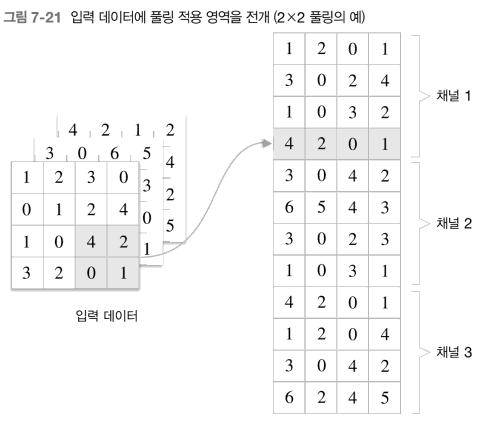
* 전개한 행렬에서 행별 최댓값을 구하고 적절한 형상으로 성형하기만 하면 됨 
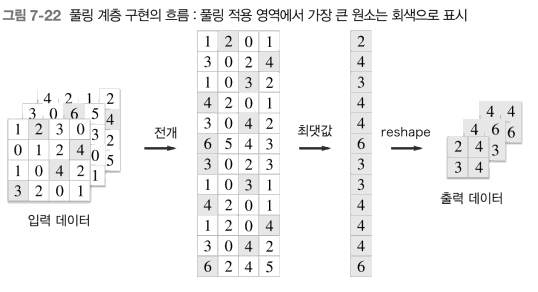

#### 풀링 계층 구현
* 1. 입력 데이터 전개
* 2. 행별 최댓값 구하기
* 3. 적절한 모양으로 성형

In [10]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # 전개 (1)
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        # 최댓값 (2)
        out = np.max(col, axis=1)
        
        # 성형 (3)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        return out

In [11]:
## pooling 전체 구현 
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

## 7.5 전체 구현하기
* input_dim : 입력 데이터(채널 수, 높이, 너비) 차원
* conv_param : 합성곱 계층의 하이퍼파라미터(딕셔너리) - filter_num - 필터 수, filter_size - 필터 크기, stride - 스트라이드, pad - 패딩, hidden_size - 은닉층(완전연결)의 뉴런 수, output_size - 출력층(완전연결)의 뉴런 수, weight_init_std - 초기화 때의 가중치 표준편차 

In [12]:
# 7.5
class SimpleConvNet:
    
        # 초기화 인수로 주어진 합성곱 계층의 하이퍼파라미터를 딕셔너리에서 꺼냄
        # 합성곱 계층의 출력 크기 계산
    
    def __init__(self, input_dim=(1, 28, 28),
                conv_param={'filter_num':30, 'filter_size':5, 
                           'pad':0, 'stride':1},
                hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / \
                            filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) *
                              (conv_output_size/2))
        
        
        # 가중치 매개변수 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0],
                                           filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, 
                                           hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        
        # CNN을 구성하는 계층들을 생성  
        self.layers = OrderedDict() # 순서가 있는 딕셔너리인 layers에 계층들을 차례로 추가 
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                          self.params['b1'],
                                          conv_param['stride'],
                                          conv_param['pad'])
        
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'],
                                       self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'],
                                       self.params['b3'])
        self.last_layer = SoftmaxWithLoss()
        
        def predict(self, x):
            for layer in self.layers.values():
                x = layer.forward(x)
            return x
        
        def loss(self, x, t):
            y = self.predict(x)
            return self.last_layer.forward(y, t)
        
        def gradient(self, x, t):
            # 순전파
            self.loss(x, t)
            
            # 역전파
            dout = 1
            dout = self.last_layer.backward(dout)
            
            layers = list(self.layers.values())
            layers.reverse()
            for layer in layers:
                dout = layer.backward(dout)
                
            # 결과 저장
            grads = {}
            grads['W1'] = self.layers['Conv1'].dW
            grads['b1'] = self.layers['Conv1'].db
            grads['W2'] = self.layers['Affine1'].dW
            grads['b2'] = self.layers['Affine1'].db
            grads['W3'] = self.layers['Affine2'].dW
            grads['b3'] = self.layers['Affine2'].db
            
            return grads 

In [14]:
import sys, os
sys.path.append("C:/Users/esj06/Desktop/deep-learning-from-scratch-master")
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """단순한 합성곱 신경망
    
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

train loss:2.299007121256335
=== epoch:1, train acc:0.191, test acc:0.204 ===
train loss:2.2965265300560107
train loss:2.2932059290672435
train loss:2.2871664169900807
train loss:2.273853013727725
train loss:2.2650992459832917
train loss:2.2526634283684746
train loss:2.229763523134467
train loss:2.2046563876996084
train loss:2.1762963885964335
train loss:2.1309664238755475
train loss:2.1323327229718156
train loss:2.0307050595204372
train loss:2.0332199209716846
train loss:1.9714114778346634
train loss:1.916673728441892
train loss:1.8957550694631926
train loss:1.7516037248020575
train loss:1.6928525910019614
train loss:1.5656438266107893
train loss:1.5918053487765753
train loss:1.4026364119962138
train loss:1.3537529973819635
train loss:1.3568665292359419
train loss:1.2053819709928724
train loss:1.2383788285380164
train loss:1.0698399321383336
train loss:0.9587786031427339
train loss:1.0009422263137653
train loss:0.9345728490801554
train loss:0.9887803077616065
train loss:0.859854004907

train loss:0.0857702614216688
train loss:0.19434756721775343
train loss:0.2372207372384178
train loss:0.20437572524012979
train loss:0.32155039701004773
train loss:0.1531256177683726
train loss:0.13407841278694094
train loss:0.17187911249210866
train loss:0.13951107064773674
train loss:0.2066228395124157
train loss:0.08529856484515266
train loss:0.12286838362584726
train loss:0.12615926676378056
train loss:0.17651301215090687
train loss:0.1772566670100624
train loss:0.11879554994286558
train loss:0.13304649100657576
train loss:0.18800776590239301
train loss:0.16729764661806257
train loss:0.23637170946927955
train loss:0.1457978717696234
train loss:0.1184137333981475
train loss:0.12049780542898418
train loss:0.12744106377269226
train loss:0.11032823091119992
train loss:0.11667393378251688
train loss:0.12916230111987428
train loss:0.16702657758327966
train loss:0.08777579647339889
train loss:0.09626994711407529
train loss:0.1886486595118231
train loss:0.1670732375662042
train loss:0.0994

train loss:0.0388428114045285
train loss:0.07395651182232134
train loss:0.061784393886038576
train loss:0.035431975536648085
train loss:0.08760509736617676
train loss:0.07939522181175639
train loss:0.07321905156027675
train loss:0.07628622060829601
train loss:0.023103597069033695
train loss:0.07459179662749377
train loss:0.046032095009758044
train loss:0.08812015944318181
train loss:0.045495582320433686
train loss:0.07936083532400845
train loss:0.07021307943465341
train loss:0.06917750997614744
train loss:0.11314447778580185
train loss:0.08221460517252588
train loss:0.055350296749003804
train loss:0.08193944937221734
train loss:0.06174702738458666
train loss:0.11661040162203261
train loss:0.06321878391325737
train loss:0.05241531187888042
train loss:0.049604522061023885
train loss:0.06795100077295818
train loss:0.11727824245089714
train loss:0.07282630621466574
train loss:0.04916784833769026
train loss:0.03635584015676178
train loss:0.07522470173755445
train loss:0.06011574455649175
tr

train loss:0.06488032373147595
train loss:0.03725213653290001
train loss:0.009469733610503586
train loss:0.054628829593683134
train loss:0.04970910582369046
train loss:0.04723213785393561
train loss:0.011031266355654016
train loss:0.014644955570135045
train loss:0.021998077044454938
train loss:0.022250013797340616
train loss:0.06938174494172712
train loss:0.06075180826370946
train loss:0.025906269545745236
train loss:0.03192417581251191
train loss:0.010037523076913222
train loss:0.038858323269249845
train loss:0.11770349872714753
train loss:0.03532371806564782
train loss:0.04845033451593581
train loss:0.015375786932493078
train loss:0.021093579795996385
train loss:0.03495526156134167
train loss:0.03958726376202244
train loss:0.009394851821957713
train loss:0.06830628256808412
train loss:0.021883322132484527
train loss:0.04290339431241533
train loss:0.029723949403522014
=== epoch:17, train acc:0.984, test acc:0.954 ===
train loss:0.029753964168383863
train loss:0.034963633496088976
trai

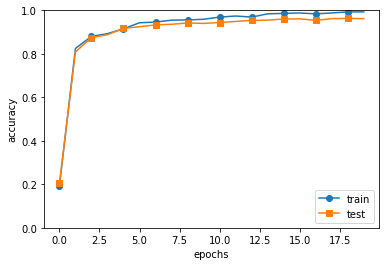

In [19]:
import sys, os
sys.path.append("C:/Users/esj06/Desktop/deep-learning-from-scratch-master")
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
# from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
# (x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()


# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 7.6 CNN 시각화하기 
### 7.6.1 1번째 층의 가중치 시각화하기
* 학습 전과 후의 1번째 층의 합성곱 계층의 가중치 : 가중치의 원소는 실수이지만, 이미지에서는 가장 작은 값(0)은 검은색, 가장 큰 값(255)은 흰색으로 정규화하여 표시함
* 흰색에서 검은색으로 변화하고 덩어리(블롭)를 가지기도 하는 규칙을 나타냄

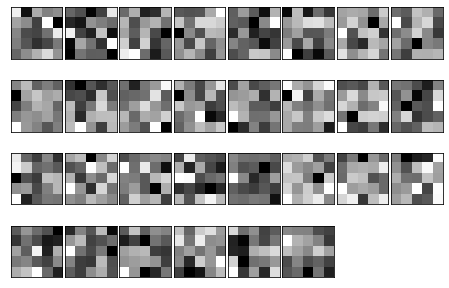

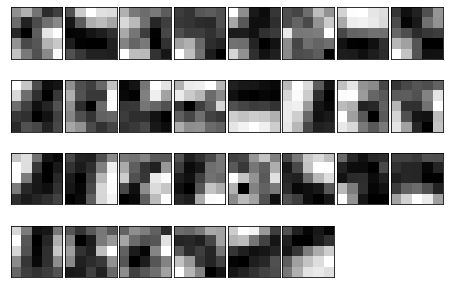

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

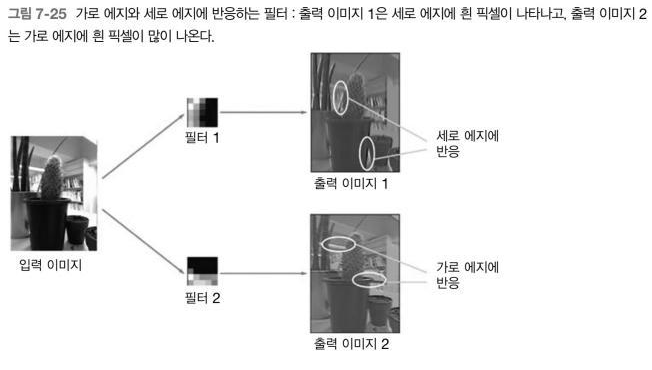
* 학습된 필터 2개를 선택하여 입력 이미지에 합성곱 처리를 한 결과
* 필터 1은 세로 에지에 반응, 필터 2는 가로 에지에 반응
* 원시적인 정보가 뒷단 계층에 전달된다는 것이 앞에서 구현한 CNN에서 일어나는 일임

### 7.6.2 층 깊이에 따른 추출 정보 변화
* 계층이 깊어질수록 추출되는 정보(정확히는 강하게 반응하는 뉴런)는 더 추상화된다는 것을 알 수 있음
* 합성곱 계층을 여러 번 쌓으면, 층이 깊어지면서 더 복잡하고 추상화된 정보가 추출, 처음 층은 단순한 에지에 반응하고, 이어서 텍스처에 반응하고, 더 복잡한 사물의 일부에 반응하도록 변화함 
* 사물의 의미를 이해하도록 변화
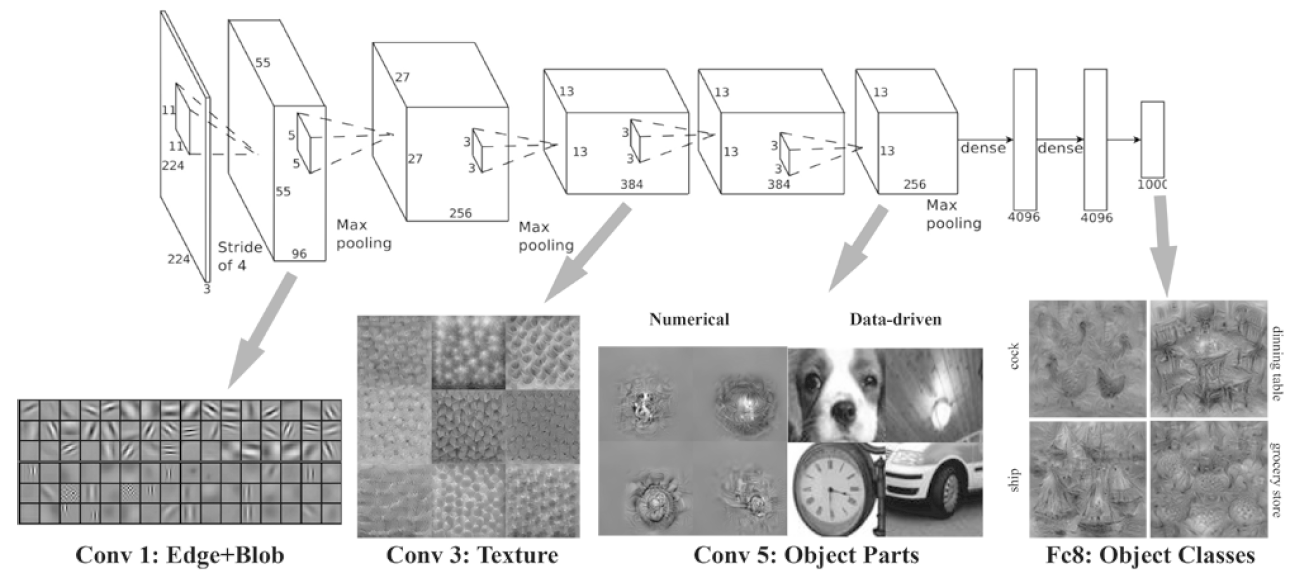

## 7.7 대표적인 CNN
### 7.7.1 LeNet (CNN의 원조)
* 손글씨 숫자를 인식하는 네트워크, 합성곱 계층과 풀링 계층(정확히는 단순히 원소를 줄이기만 하는 서브샘플링 계층)을 반복하고, 마지막으로 완전연결 계층을 거치면서 결과를 출력
* LeNet -> 시그모이드 함수, CNN -> ReLU
* LeNet -> 서브샘플링을 하여 중간 데이터의 크기를 줄임, 현재 -> 최대 풀링이 주류

### 7.7.2 AlexNet
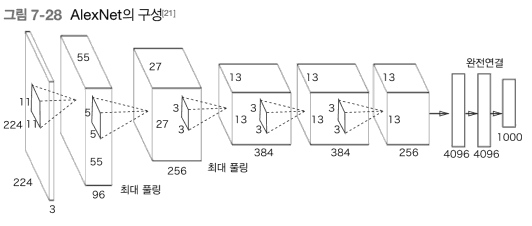
* 합성곱 계층과 풀링 계층을 거듭하며 마지막으로 완전연결 계층을 거쳐 결과를 출력
* ReLU 함수 이용, LRN이라는 국소적 정규화를 실시하는 계층 이용, 드롭아웃 사용